In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
labels = pd.read_csv('../csv/train_labels.csv')
labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [4]:
values = pd.read_csv('../csv/train_values.csv')
values.head(10).T

,0,1,2,3,4,5,6,7,8,9
building_id,802906,28830,94947,590882,201944,333020,728451,475515,441126,989500
geo_level_1_id,6,8,21,22,11,8,9,20,0,26
geo_level_2_id,487,900,363,418,131,558,475,323,757,886
geo_level_3_id,12198,2812,8973,10694,1488,6089,12066,12236,7219,994
count_floors_pre_eq,2,2,2,2,3,2,2,2,2,1
age,30,10,10,10,30,10,25,0,15,0
area_percentage,6,8,5,6,8,9,3,8,8,13
height_percentage,5,7,5,5,9,5,4,6,6,4
land_surface_condition,t,o,t,t,t,t,n,t,t,t
foundation_type,r,r,r,r,r,r,r,w,r,i


Me armo un dataframe mappeando los pisos de la estructura al daño que reciben. Una fila por caso.

In [5]:
floor_data = pd.DataFrame([values.count_floors_pre_eq, labels.damage_grade]).T
floor_data.set_index("count_floors_pre_eq")

,damage_grade
count_floors_pre_eq,
2,3
2,2
2,3
2,2
3,3
...,...
1,2
2,3
3,3


Podemos ver la cantidad de veces que aparece cada nivel de pisos.

In [6]:
floor_data.groupby(["count_floors_pre_eq"]).agg({"damage_grade": "count"})

,damage_grade
count_floors_pre_eq,
1,40441
2,156623
3,55617
4,5424
5,2246
6,209
7,39
8,1
9,1


Concluimos que de las estructuras con pisos > 6 no tenemos suficiente información para el análisis.

Mapeamos la cantidad de pisos al daño promedio de los mismos y la cantidad de veces que estos aparecen en el dataframe original.

In [7]:
floor_data = floor_data.loc[floor_data["count_floors_pre_eq"] < 7]
floor_dmg = floor_data.rename(columns={"count_floors_pre_eq": "Pisos Pre-Terremoto",\
                                       "damage_grade": "Grado de Daño"})\
                      .groupby(["Pisos Pre-Terremoto"]).agg({"Grado de Daño": np.mean})
floor_dmg

,Grado de Daño
Pisos Pre-Terremoto,
1,2.042160
2,2.239231
3,2.396713
4,2.117257
5,2.114426
6,1.856459


Text(0, 0.5, 'Porcentaje de grado de destruccion sobre destruccion total.')

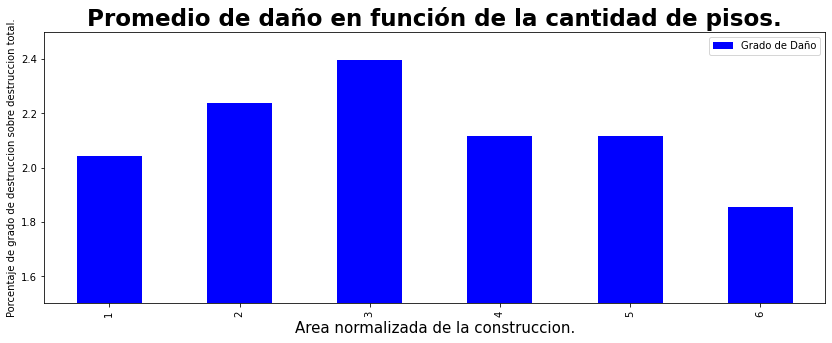

In [16]:
floor_dmg.plot(figsize=(14, 5), title="Promedio de daño en función de la cantidad de pisos.", kind='bar',\
     ylim=(1.5, 2.5), color="blue")
plt.title("Promedio de daño en función de la cantidad de pisos.",\
          fontsize =23, fontweight = 'bold')

plt.xlabel("Area normalizada de la construccion.", fontsize=15)
plt.ylabel("Porcentaje de grado de destruccion sobre destruccion total.", fontsize=10)